In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_excel("result.xlsx", sheet_name= "low")
df2 = pd.read_excel("result.xlsx", sheet_name= "high")
df2

,What is your current level of education or professional experience in your field of study?,Do you have experience writing a literature review?,Do you have trouble developing an appropriate search query when starting to write a literature review?,Which steps were you able to complete? (Multiple choices),I feel confident while starting to create a new project.,I feel confident while filling in basic information.,I feel confident while uploading samples.,I feel confident while constructing the query.,My experience using other applications helped me in completing the tasks.,I can always find which step I am now and what the coming steps are.,The actions I took always met with a response.,The builded search query is exactly like what I need.,I feel ____ while using this app.,Are there any features of this app that you think are missing or could be improved?
0,PhD,Yes,Yes,"Start to create a new project, Step 1: fill in...",5,5,5,4,4,5,4,4,Acceptant,NaN
1,PhD,Yes,Yes,"Start to create a new project, Step 1: fill in...",4,5,4,4,5,5,5,5,Joy,NaN
2,PhD,Yes,No,"Start to create a new project, Step 1: fill in...",4,4,4,4,4,4,4,4,None,NaN
3,PhD,Yes,No,"Start to create a new project, Step 1: fill in...",2,4,3,2,5,4,5,3,Surprised,I don't think the icon fits the user's mental ...
4,PhD,Yes,Yes,"Start to create a new project, Step 1: fill in...",5,5,4,4,4,5,5,3,Surprised,NaN
5,PhD,Yes,No,"Start to create a new project, Step 1: fill in...",5,5,4,3,5,4,4,4,Acceptant,NaN
6,PhD,Yes,No,Step 4: construct the query,4,4,5,3,3,4,4,3,Acceptant,NaN
7,PhD,Yes,No,"Start to create a new project, Step 1: fill in...",5,5,5,5,5,5,5,5,Surprised,NaN
8,PhD,Yes,No,Step 4: construct the query,5,5,4,3,3,4,4,4,Surprised,The design is good. I feel the system sometime...
9,PhD,Yes,Yes,"Start to create a new project, Step 1: fill in...",5,4,3,2,2,5,5,2,Acceptant,The accuracy of search results needs to be imp...


([<matplotlib.patches.Wedge at 0x1f0a8226820>,
 [Text(-0.5212555909091209, 0.968655051577177, 'student:23'),
  Text(0.5212556816011501, -0.968655002773702, 'researcher:12')])

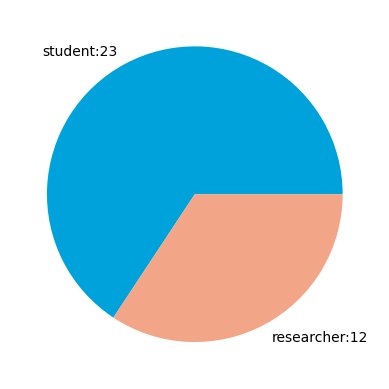

In [2]:
# student/researcher
plt.pie([df1.shape[0], df2.shape[0]],
        labels=[f'student:{df1.shape[0]}',f'researcher:{df2.shape[0]}'], 
        colors=["#00A2DB", "#F3A687"],
       )

([<matplotlib.patches.Wedge at 0x1f0a98c3eb0>,
 [Text(-0.5060716130681925, 0.9766737031611724, 'Yes'),
  Text(0.5060717045109816, -0.9766736557793242, 'No')],
 [Text(-0.2760390616735595, 0.5327311108151849, '65.22%'),
  Text(0.2760391115514445, -0.5327310849705404, '34.78%')])

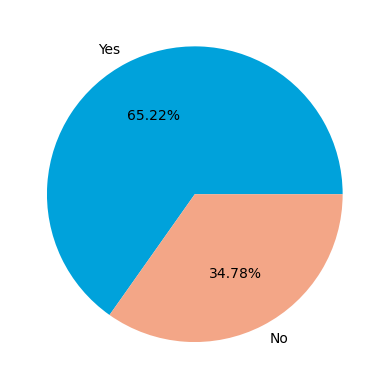

In [3]:
# student lr
plt.pie(df1["Do you have experience writing a literature review?"].value_counts(),
        labels=['Yes','No'],
        colors=["#00A2DB", "#F3A687"],
        autopct= '%1.2f%%'
       )

([<matplotlib.patches.Wedge at 0x1f0a9919550>],
 [Text(-1.1, 1.3471114790620887e-16, 'Yes')],
 [Text(-0.6, 7.347880794884119e-17, '100.00%')])

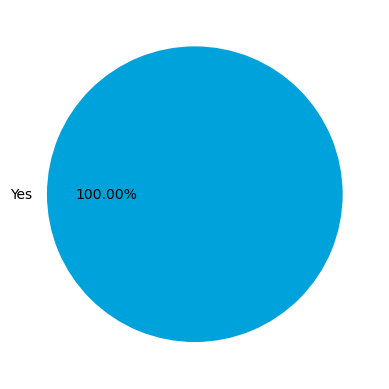

In [4]:
# researcher lr
plt.pie(df2["Do you have experience writing a literature review?"].value_counts(),
        labels=['Yes'],
        colors=["#00A2DB", "#F3A687"],
        autopct= '%1.2f%%'
       )

([<matplotlib.patches.Wedge at 0x1f0a814cdc0>,
 [Text(-0.7508084640855961, 0.8039195545932617, 'Yes'),
  Text(0.7508084640855958, -0.803919554593262, 'No')],
 [Text(-0.4095318895012342, 0.4385015752326881, '73.91%'),
  Text(0.409531889501234, -0.43850157523268835, '26.09%')])

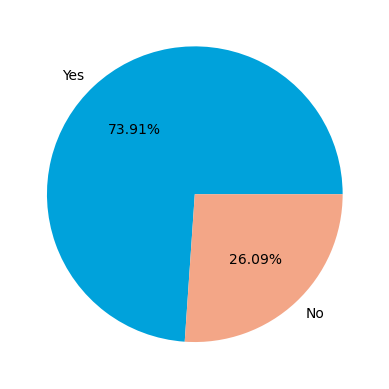

In [5]:
plt.pie(df1["Do you have trouble developing an appropriate search query when starting to write a literature review?"].value_counts(),
        labels=['Yes','No'],
        colors=["#00A2DB", "#F3A687"],
        autopct= '%1.2f%%'
       )

([<matplotlib.patches.Wedge at 0x1f0a81e45e0>,
 [Text(6.735557395310444e-17, 1.1, 'Yes'),
  Text(-2.0206672185931328e-16, -1.1, 'No')],
 [Text(3.6739403974420595e-17, 0.6, '50.00%'),
  Text(-1.1021821192326178e-16, -0.6, '50.00%')])

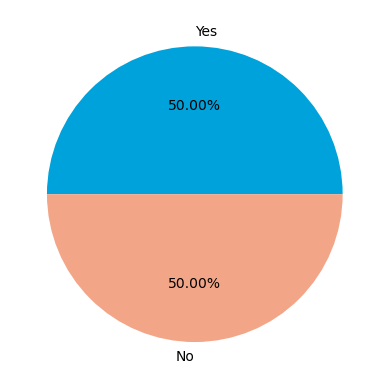

In [6]:
plt.pie(df2["Do you have trouble developing an appropriate search query when starting to write a literature review?"].value_counts(),
        labels=['Yes','No'],
        colors=["#00A2DB", "#F3A687"],
        autopct= '%1.2f%%'
       )

# 4 steps

In [7]:
import scipy.stats as stats

# Null hypo: student group has higher level of overall steps

group1 = [df1["I feel confident while starting to create a new project."].mean(), df1["I feel confident while filling in basic information."].mean(), df1["I feel confident while uploading samples."].mean(), df1["I feel confident while constructing the query."].mean()]
group2 = [df2["I feel confident while starting to create a new project."].mean(), df2["I feel confident while filling in basic information."].mean(), df2["I feel confident while uploading samples."].mean(), df2["I feel confident while constructing the query."].mean()]
print(group1)
print(group2)


t_stat, p_val = stats.ttest_rel(group1, group2)

print("t-statistic:", t_stat)
print("p-value:", p_val)

[3.5652173913043477, 3.652173913043478, 3.608695652173913, 3.347826086956522]
[4.416666666666667, 4.666666666666667, 4.25, 3.5]
t-statistic: -3.5518531511583196
p-value: 0.03804037540174106


## Null hypo: student group can do better in each step

In [8]:
group1 = df1["I feel confident while starting to create a new project."]
group2 = df2["I feel confident while starting to create a new project."]

t_stat, p_val = stats.ttest_ind(group1, group2,  equal_var=False, alternative='less')

print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: -2.435705796616713
p-value: 0.010855170095944597


In [9]:
group1 = df1["I feel confident while filling in basic information."]
group2 = df2["I feel confident while filling in basic information."]

t_stat, p_val = stats.ttest_ind(group1, group2,  equal_var=False, alternative='less')

print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: -3.633773742537493
p-value: 0.0004808576027347831


In [10]:
group1 = df1["I feel confident while uploading samples."]
group2 = df2["I feel confident while uploading samples."]

t_stat, p_val = stats.ttest_ind(group1, group2,  equal_var=False, alternative='less')

print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: -2.241028690600699
p-value: 0.016893694661044574


In [11]:
group1 = df1["I feel confident while constructing the query."]
group2 = df2["I feel confident while constructing the query."]

t_stat, p_val = stats.ttest_ind(group1, group2,  equal_var=False, alternative='less')

print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: -0.42883129682046145
p-value: 0.3356862905099923


# 4 properties

In [12]:
# Null hypo: student group has higher level of overall learnibility
group1 = [df1["My experience using other applications helped me in completing the tasks."].mean(), df1["I can always find which step I am now and what the coming steps are."].mean(), df1["The actions I took always met with a response."].mean(), df1["The builded search query is exactly like what I need."].mean()]
group2 = [df2["My experience using other applications helped me in completing the tasks."].mean(), df2["I can always find which step I am now and what the coming steps are."].mean(), df2["The actions I took always met with a response."].mean(), df2["The builded search query is exactly like what I need."].mean()]

print(group1)
print(group2)
t_stat, p_val = stats.ttest_rel(group1, group2)

print("t-statistic:", t_stat)
print("p-value:", p_val)

[3.4347826086956523, 3.6956521739130435, 3.608695652173913, 3.4347826086956523]
[4.166666666666667, 4.416666666666667, 4.333333333333333, 3.5833333333333335]
t-statistic: -4.028795016940818
p-value: 0.02748707420070571


## Null hypo: student group has higher level of each properties of learnibility

In [13]:
group1 = df1["My experience using other applications helped me in completing the tasks."]
group2 = df2["My experience using other applications helped me in completing the tasks."]

t_stat, p_val = stats.ttest_ind(group1, group2,  equal_var=False, alternative='less')

print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: -2.020771714737487
p-value: 0.027910154191448888


In [14]:
group1 = df1["I can always find which step I am now and what the coming steps are."]
group2 = df2["I can always find which step I am now and what the coming steps are."]

t_stat, p_val = stats.ttest_ind(group1, group2,  equal_var=False, alternative='less')

print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: -3.1777108893368413
p-value: 0.0016519381815514175


In [15]:
group1 = df1["The actions I took always met with a response."]
group2 = df2["The actions I took always met with a response."]

t_stat, p_val = stats.ttest_ind(group1, group2,  equal_var=False, alternative='less')

print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: -2.5979404134717807
p-value: 0.0071148797514760265


In [16]:
group1 = df1["The builded search query is exactly like what I need."]
group2 = df2["The builded search query is exactly like what I need."]

t_stat, p_val = stats.ttest_ind(group1, group2,  equal_var=False, alternative='less')

print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: -0.46413892662109935
p-value: 0.32352177108089847


# Emotions

In [17]:
import numpy as np

# There is no significant difference in the emotions when using the app between the two groups of users
group1 = df1["I feel ____ while using this app."].values.tolist()
group2 = df2["I feel ____ while using this app."].values.tolist()
d = {"Surprised":5, "Joy":4, "Anticipate":3, "Acceptant":2, "None":0}
for i in range(len(group1)):
    group1[i] = d[group1[i]]
for i in range(len(group2)):
    group2[i] = d[group2[i]]

print(np.mean(group1))
print(np.mean(group2))

t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_val) 

2.608695652173913
2.8333333333333335
t-statistic: -0.3595316588732234
p-value: 0.7234346354599477
